In [1]:
import tensorflow as tf

# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


In [5]:
import tensorflow as tf
#创建变量
state = tf.Variable(0,name='counter')
value = tf.constant(1) #创建一个常量
new_value = tf.add(state,value) #相加
update = tf.assign(state,new_value)#将new_value更新到state

init = tf.global_variables_initializer()#初始化所有的变量，只要定义了变量就一定需要这个

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


In [10]:
#运行的时候才初始化值
#placeholder & feed_dict绑定使用,feed_dict是字典的形式初始化
input1 = tf.placeholder(tf.float32) #一般默认的都是float32
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[2.],input2:[5.]}))B
    
x = tf.placeholder(tf.string)
with tf.Session() as sess:
    print(sess.run(x,feed_dict={x:'hello world'}))

[ 10.]
hello world


In [12]:
#数据类型强制转换
#y = tf.subtract(tf.constant(2.0),tf.constant(1)) #这种浮点数和整数数据类型不一致无法运算，需要强制转换
y = tf.subtract(tf.cast(tf.constant(2.0),tf.int32),tf.constant(1))
with tf.Session() as sess:
    print(sess.run(y))

1


In [14]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

# TODO: Convert the following to TensorFlow:
x = 10
y = 2
z = x/y - 1
print(z)
# TODO: Print z from a session
x = tf.constant(10)
y = tf.constant(2)

z = tf.subtract(tf.divide(x,y),1)
with tf.Session() as sess:
    print(sess.run(z))

4.0
4.0


In [23]:
import numpy as np
w = np.array([[1,2,3]])
h = np.array([1,2])
print(np.dot(h[:,None],w))

[[1 2 3]
 [2 4 6]]


## Tensorflow
下面使用了两个不同地方学习的tensorflow构建神经网络的过程学习。

(300, 1)
(300, 1)
(1, 10) (1, 10)
output.shape: (?, 10)
(10, 1) (1, 1)
output.shape: (?, 1)


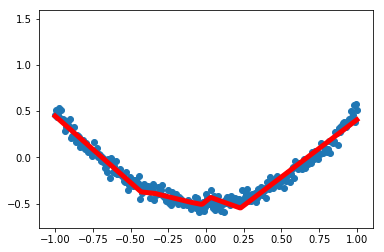

In [43]:
#使用tensorflow添加神经网络层
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
def add_layer(inputs,in_size,out_size,activate_function = None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biais = tf.Variable(tf.zeros([1,out_size]) + 0.1) #因为最好不要为0
    print(Weights.shape,biais.shape)
    """
    !!!下面y=xw+b，一定是(inputs,weights)否则相乘的结果不对就会报错,
    但是这里报错很奇怪，竟然(1,10)*(300,1)竟然也能成功，所以还不容易发现错误
    """
    Wx_add_b = tf.matmul(inputs,Weights) + biais  
    if activate_function is None:
        output = Wx_add_b
    else:
        output = activate_function(Wx_add_b)
    print('output.shape:',output.shape)
    return output

x_data = np.linspace(-1,1,300)[:,np.newaxis]
print(x_data.shape)
#添加噪音
noise = np.random.normal(0,0.05,x_data.shape)  #(mean,std,scale)
y_data = np.square(x_data) -0.5 + noise
print(y_data.shape)
xs = tf.placeholder(tf.float32,[None,1])#设定为可以接受任意行1列
ys = tf.placeholder(tf.float32,[None,1])
#构建神经网络 输入层1 隐藏层10 输出层1
l1 = add_layer(xs,1,10,activate_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activate_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)#0.1为learning rate，训练目的是减小loss

init = tf.global_variables_initializer()

#加上显示
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)#使用点来表示数据
plt.ion()#可以让程序在show之后不会暂停，继续运行
#plt.show(block = False)

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
        if i%20 == 0:
            #print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
            try:
                ax.lines.remove(lines[0]) #每次循环画了一条直线后下次需要将上次的线删除，这里选择先删除上一条再画
            except Exception:
                pass
            prediction_value = sess.run(prediction,feed_dict={xs:x_data})
            lines = ax.plot(x_data,prediction_value,'r-',lw=5)#横坐标，纵坐标，颜色，线的宽度 
            plt.pause(0.1)#每次画完暂停0.1s

        
    


In [9]:
# 来自课程deep learning
#数据源是mnist的0，1，2三个数的识别
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    weights = tf.Variable(tf.truncated_normal((n_features,n_labels),name='weights'))
    return weights


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    biases = tf.Variable(tf.zeros(n_labels),name = 'biasis')
    return biases


def linear(inputs, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    print(inputs.shape)
    output = tf.add(tf.matmul(inputs,w),b)
    return output

# Solution is available in the other "sandbox_solution.py" tab
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
with tf.name_scope('inputs') as scope:
    features = tf.placeholder(tf.float32,name='features')
    labels = tf.placeholder(tf.float32,name='labels')
with tf.name_scope('layer') as scope:
    # Weights and Biases
    w = get_weights(n_features, n_labels)
    b = get_biases(n_labels)
print(w.shape,b.shape)
# Linear Function xW + b
with tf.name_scope('output') as scope:
    logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)
###这里的神经网络只有一层，就是将输入linear后使用activate function得到output
#merged = tf.merge_all_summaries()  

with tf.Session() as session:
    # TODO: Initialize session variables
    init = tf.global_variables_initializer()
    session.run(init)
    # Softmax
    prediction = tf.nn.softmax(logits)
    #print(prediction.shape)
    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.0001

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})
    
    summary_writer = tf.summary.FileWriter('C:/git/cn-deep-learning/learning-practice/tmp', session.graph)
    
   # result = sess.run(merged) #merged也是需要run的  
   ## writer.add_summary(result)  
    
# Print loss
summary_writer.close()
print('Loss: {}'.format(l))


(784, 3) (3,)
<unknown>
Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz
Loss: 9.445173263549805
